# Proyek Analisis Data Bike Sharing

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Berapakah Jumlah Perbandingan Pengguna Bikeshare Casual vs. Registered per tahun berdasarkan bulan?
- Pertanyaan 2: Berapakah Pertumbuhan Pengguna Bikeshare Tiap Bulan Selama Dua Tahun?
- Pertanyaan 3: Berapakah Perbandingan jumlah Pengguna Bikeshare Pada Setiap Cuaca?



## Menyaipkan semua library yang dibuthkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Pada tugas project untuk course belajar analisis data dengan python kali ini, saya memilih Bike Sharing Dataset untuk saya analisis. Langkah awal dalam analisis data yaitu melakukan Data Wragling. Berikut juga dilampirkan karakterisitik dari data yang diambil.


Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
- instant: record index
  
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Gathering Data


Hal pertama dalam data wragling adalah melakukan gathering data atau pengumpulan data. Pada kali ini saya menggunakan Bike Sharing Dataset untuk saya analisis. Berikut juga dataset yang saya gunakan http://capitalbikeshare.com/system-data

In [ ]:
# Tabel Day

day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Diatas merupakan tabel Day yang merupakan historical selama 2 tahun (2011 - 2012 ) penggunaan bike sharing rental dari Capital Bikeshare system, Washington D.C., USA which. Untuk tabel Day diatas merupakan historical perhitungan per hari

In [ ]:
# Tabel hour

hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Diatas merupakan tabel hour yang merupakan historical selama 2 tahun (2011 - 2012 ) penggunaan bike sharing rental dari Capital Bikeshare system, Washington D.C., USA which. Untuk tabel Day diatas merupakan historical perhitungan per jam.

### Assessing Data

Selanjutnya masuk ke tahap kedua dalam proses data wrangling yaitu assessing data.  Pada proses ini kita akan menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.

#### Tabel day

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Data pertama yang akan kita nilai adalah day_df. Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df. Proses ini dapat dilakukan menggunakan method info() seperti contoh kode berikut.

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika diperhatikan, jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string). Selain itu juga untuk kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit akan kita ubah tipe data nya menjadi tipe data kategori.

Masalah selanjutnya yang harus kita periksa ialah duplikasi data. Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.

In [ ]:
print("Jumlah duplikasi pada tabel day: ", day_df.duplicated().sum())

Jumlah duplikasi pada tabel day:  0


Dapat dilihat bahwa untuk tabel day tidak memiliki data yang duplikat.

Selanutnya memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df. Untuk mempermudah pemeriksaan, akan digunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame. Berikut merupakan contoh penggunaannya.

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Tabel hour

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Data keuda yang akan kita nilai adalah hour_df. Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df. Proses ini dapat dilakukan menggunakan method info() seperti contoh kode berikut.

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika diperhatikan, jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string). Selain itu juga untuk kolom season, yr, mnth, hr,holiday, weekday, workingday, dan weathersit akan kita ubah tipe data nya menjadi tipe data kategori.

Masalah selanjutnya yang harus kita periksa ialah duplikasi data. Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.

In [ ]:
print("Jumlah duplikasi pada tabel hour: ", hour_df.duplicated().sum())

Jumlah duplikasi pada tabel hour:  0


Dapat dilihat bahwa untuk tabel hour tidak memiliki data yang duplikat.

Selanutnya memeriksa parameter statistik dari kolom numerik yang terdapat dalam hour_df. Untuk mempermudah pemeriksaan, akan digunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame. Berikut merupakan contoh penggunaannya.

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Rangkuman Assesing Data

**Tabel day**


*   Mengubah kolom dteday menjadi tipe datanya datetime
*   Mengubah kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit akan kita ubah tipe data nya menjadi tipe data kategori.


**Tabel hour**


*   Mengubah kolom dteday menjadi tipe datanya datetime
*   Mengubah kolom season, yr, mnth, hr,holiday, weekday, workingday, dan weathersit akan kita ubah tipe data nya menjadi tipe data kategori.







### Cleansing Data

#### Cleaning Tabel day



 Mengubah kolom dteday menjadi tipe datanya datetime dan kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit akan diubah ubah tipe data nya menjadi tipe data kategori.




In [ ]:
# Merubah kolom dteday menjadi tipe data date time
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
# Mengubah kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit akan diubah ubah tipe data nya menjadi tipe data kategori.
category_columns = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

for column in category_columns:
  day_df[column] = day_df[column].astype('category')

In [ ]:
# Cek kembali tipe data dengan menggunakan method .info()

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

#### Cleaning Tabel hour

Mengubah kolom dteday menjadi tipe datanya datetime dan kolom season, hr,yr, mnth, holiday, weekday, workingday, dan weathersit akan diubah ubah tipe data nya menjadi tipe data kategori.

In [ ]:
# Merubah kolom dteday menjadi tipe data date time
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
# Mengubah kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit akan diubah ubah tipe data nya menjadi tipe data kategori.
category_columns = ['season','yr','mnth','holiday','weekday','hr','workingday','weathersit']

for column in category_columns:
  hour_df[column] = hour_df[column].astype('category')

## EDA

### Eksplorasi Tabel Day

Pertama kita akan mengeksplorasi tabel day terlebih dahulu. Sebagai awalan dalam eksplorasi, kita akan menampilkan tabel day dan juga melihat statistik descriptivenya.

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df.describe(include='all')

<ipython-input-65-a3f85d0fb009>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Dari statistik descriptive diatas terdapat beberapa informasi seperti:



1.   rata rata banyaknya penggunaan bikesharing ini adalah 4504.
2.   bikesharing paling sering digunakan saat season fall
1.   penggunaan bikesharing paling banyak digunakan saat cuaca Clear, Few clouds, Partly cloudy, Partly cloudy


Sekarang akan dicoba untuk demografi penggunaan bikesharing terhadapat weathersit

In [ ]:
day_df.groupby('weathersit').instant.count().sort_values(ascending=False)

weathersit
1    463
2    247
3     21
Name: instant, dtype: int64

Dapat diliat dari hasil diatas, penggunaan terbanyak bikesharing adalah saat kondisi cuaca Clear, Few clouds, Partly cloudy, Partly cloudy sebanyak 463. Kemudian akan didemografikan juga jumlah pengguna casual vs registered terhadapt weathersit.

In [ ]:
day_df.groupby('weathersit').agg({
    'instant':'nunique',
    'casual':'sum',
    'registered':'sum'
})

,instant,casual,registered
weathersit,,,
1,463,446346,1811606
2,247,169776,827082
3,21,3895,33974


### Eksplorasi Tabel Hour

selanjutnya akan kita coba eksplorasi tabel hour. Pertama akan kita coba liat 5 data pertama pada tabel hour dan juga statistik descriptive pada tabel hour.

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hour_df.describe(include='all')

<ipython-input-69-8c27de8cc91c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include='all')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,3.0,1.0,5.0,17.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Selanjutnya akan didemografikan pada jam berapa penggunaan bikesharing palign sering digunakan.

In [ ]:
hour_df.groupby('hr').agg({
    'instant':'nunique',
    'casual':'sum',
    'registered':'sum'
}).sort_values(by='instant',ascending=False)

,instant,casual,registered
hr,,,
17,730,54220,282640
16,730,53834,173914
13,729,52713,132206
15,729,54606,128543
14,729,55089,120563
12,728,49718,134696
22,728,16200,79412
21,728,20570,104875
20,728,26378,138172


Hasil diatas merupakan banyaknya pengguna antara casual dan juga registered pada tiap jam.

In [ ]:
hour_df.groupby('hr').agg({
    'instant':'nunique',
    'cnt':'sum'
}).sort_values(by='instant',ascending=False)

,instant,cnt
hr,,
17,730,336860
16,730,227748
13,729,184919
15,729,183149
14,729,175652
12,728,184414
22,728,95612
21,728,125445
20,728,164550


Dapat diliat, jam 17 merupakan jam yang sering digunakan dalam pemakaian bikesharing.

### Eksplorasi all tabel

In [ ]:
all_df = pd.merge(day_df, hour_df, on='instant', how='left')
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
all_df.corr()

<ipython-input-73-635530388cd0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_df.corr()


,instant,temp_x,atemp_x,hum_x,windspeed_x,casual_x,registered_x,cnt_x,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
instant,1.000000,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830,-0.181786,-0.132819,0.254328,-0.143311,-0.104639,0.053204,0.037873
temp_x,0.150580,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494,-0.431550,-0.452519,-0.175027,0.074141,-0.161858,0.016740,-0.003999
atemp_x,0.152638,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066,-0.430288,-0.452413,-0.184512,0.074182,-0.160355,0.020423,-0.000297
hum_x,0.016375,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659,-0.014562,0.003970,0.057050,-0.056571,-0.003833,0.051851,0.049024
windspeed_x,-0.112620,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545,0.036045,0.035740,-0.087335,0.016941,0.048099,0.075040,0.077571
casual_x,0.275255,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804,-0.304139,-0.306393,-0.112973,0.028200,-0.083040,-0.002754,-0.012879
registered_x,0.659623,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517,-0.316190,-0.291519,0.053493,-0.086994,-0.148688,0.002147,-0.016303
cnt_x,0.628830,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000,-0.362463,-0.343391,0.003042,-0.060071,-0.149188,0.000753,-0.017696
temp_y,-0.181786,-0.431550,-0.430288,-0.014562,0.036045,-0.304139,-0.316190,-0.362463,1.000000,0.933880,0.201922,0.099002,0.432903,0.173916,0.219456
atemp_y,-0.132819,-0.452519,-0.452413,0.003970,0.035740,-0.306393,-0.291519,-0.343391,0.933880,1.000000,0.328709,-0.230339,0.379717,0.138538,0.179119


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapakah Jumlah Perbandingan Pengguna Bikeshare Casual vs. Registered per tahun berdasarkan bulan?

Langkah pertama kita akan memfilter untuk tahun 2011 dan 2012 dan menampungnya ke dalam variabel filtered_df. Setelah itu kita menggrupkan dengan memanfaatkan filter tahun yang telah kita buat.

In [ ]:
# Filter data for the years 2011 and 2012
filtered_df = day_df[(day_df['yr'] == 0) | (day_df['yr'] == 1)]

# Group by year, month and calculate the sum of 'casual' and 'registered'
sum_casual_registered_df = filtered_df.groupby(["yr", "mnth"])[['casual', 'registered']].sum().reset_index()

Setelah itu kita buat visualisasinya. Untuk code nya seperti berikut.

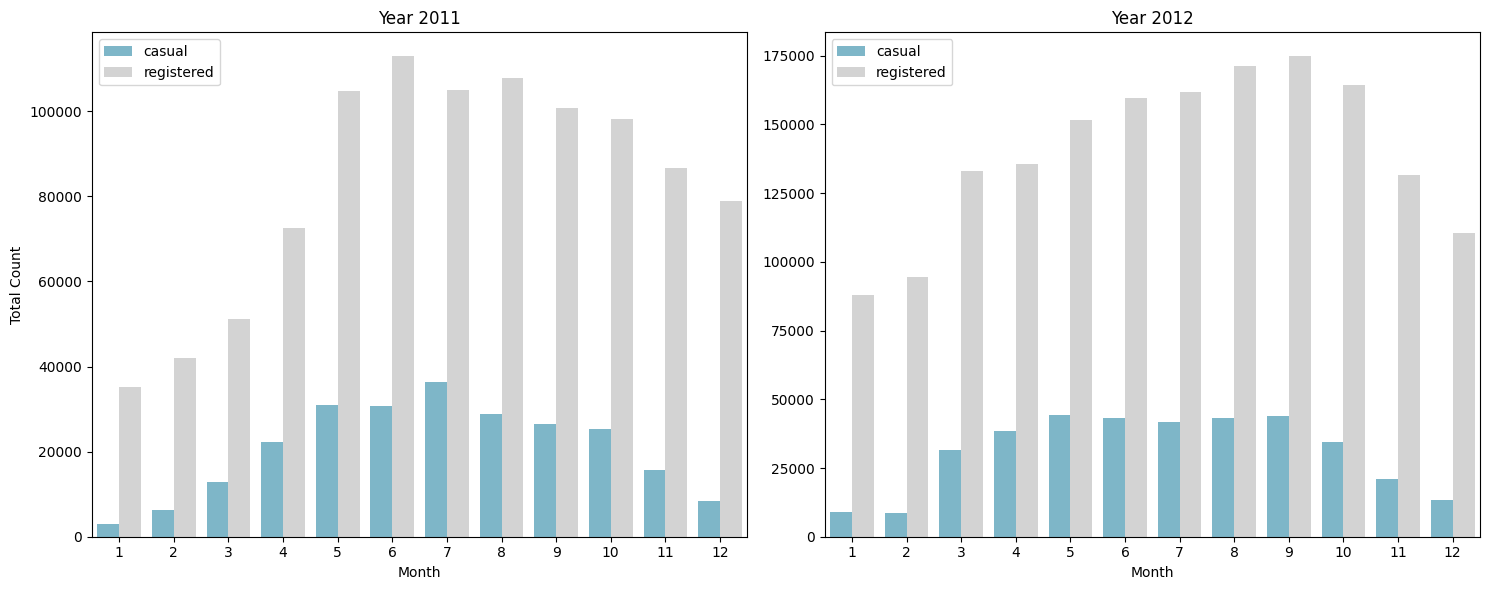

In [ ]:
# Filter data for the years 2011 and 2012
filtered_df = day_df[(day_df['yr'] == 0) | (day_df['yr'] == 1)]

# Group by year, month and calculate the sum of 'casual' and 'registered'
sum_casual_registered_df = filtered_df.groupby(["yr", "mnth"])[['casual', 'registered']].sum().reset_index()

# Create a bar plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot for year 2011
sns.barplot(x="mnth", y="value", hue="variable", data=sum_casual_registered_df[sum_casual_registered_df['yr'] == 0]
            .melt(id_vars=["yr", "mnth"], value_vars=["casual", "registered"]),
            palette={"casual": "#72BCD4", "registered": "#D3D3D3"}, ax=ax[0])
ax[0].set_ylabel("Total Count")
ax[0].set_xlabel("Month")
ax[0].set_title("Year 2011")
ax[0].legend(title=None, loc='upper left')

# Plot for year 2012
sns.barplot(x="mnth", y="value", hue="variable", data=sum_casual_registered_df[sum_casual_registered_df['yr'] == 1]
            .melt(id_vars=["yr", "mnth"], value_vars=["casual", "registered"]),
            palette={"casual": "#72BCD4", "registered": "#D3D3D3"}, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Month")
ax[1].set_title("Year 2012")
ax[1].legend(title=None, loc='upper left')

plt.tight_layout()
plt.show()

Dari hasil visualisasi diatas terdapat kesimpulan bahwa pada tahun 2011 pengguna Bikeshare paling banyak dari golongan registered yaitu bulan 6 dan untuk pengguna Bikeshare paling banyak dari golongan casual yaiut bulan 7. Pada tahun 2012 pengguna Bikeshare paling banyak dari golongan registered yaitu bulan 9 dan untuk pengguna Bikeshare paling banyak dari golongan casual yaiut bulan 9.

### Pertanyaan 2: Berapakah Pertumbuhan Pengguna Bikeshare Tiap Bulan Selama Dua Tahun?

Pertanyaan kedua mengenai pertumbuhan pengguna Bikeshare tiap bulan selama dua tahun. Langkan pertama yaitu mengubah bentuk tanggal menjadi per bulan. Setelah itu kita visualisasikan.

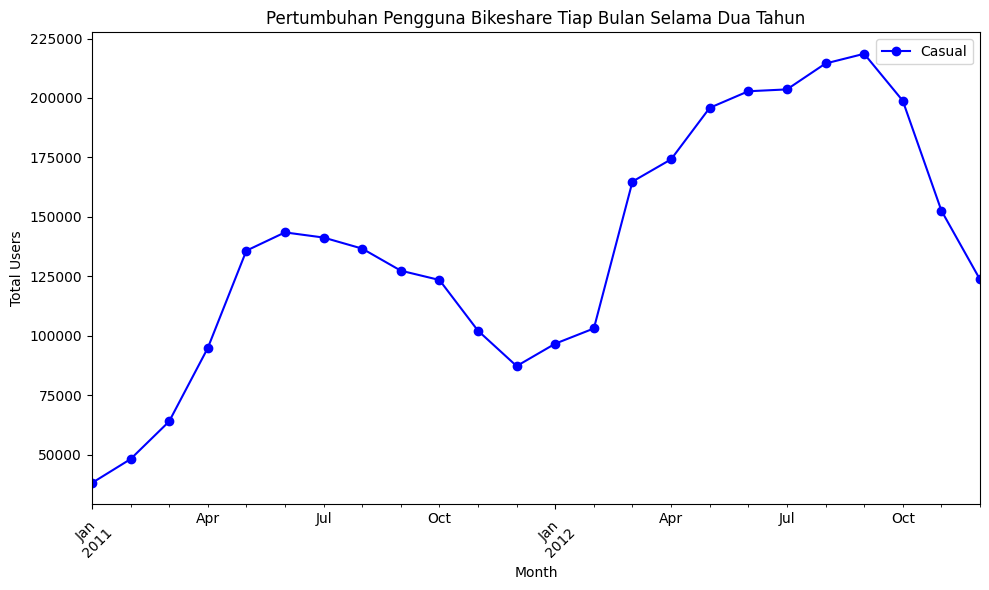

In [ ]:
# Menghitung total pengguna (casual + registered) per bulan
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['year_month'] = day_df['dteday'].dt.to_period('M')
df_monthly = day_df.groupby('year_month')['cnt'].sum()

# Membuat plot garis untuk pertumbuhan jumlah pengguna per bulan
plt.figure(figsize=(10, 6))
df_monthly.plot(marker='o', linestyle='-', color=['b', 'g'])
plt.xlabel('Month')
plt.ylabel('Total Users')
plt.title('Pertumbuhan Pengguna Bikeshare Tiap Bulan Selama Dua Tahun')
plt.xticks(rotation=45)
plt.legend(['Casual', 'Registered'])
plt.tight_layout()
plt.show()


Dari hasil visualisasi diatas dapat diliat bahwa pengguna Bikeshare terbanyak ada di bulan September 2012

### Pertanyaan 3: Berapakah Perbandingan jumlah Pengguna Bikeshare Pada Setiap Cuaca?

Pertanyaan ketiga mengenai perbandingan jumlah pengguna bikeshare pada setiap cuaca. Langkah pertama yang dilakukan membuat variabel weatet_df yang berisikan jumlah pengguna bikeshare tiap cuaca. Kemudian setelah itu kita visualisasikan dengan menggunakan diagram batang.Untuk code nya seperti berikut.

In [ ]:
weater_df = day_df.groupby('weathersit')['cnt'].sum()
weater_df.head()

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64

<ipython-input-78-c7726c96d516>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0f}'.format(x) for x in ax.get_yticks()])


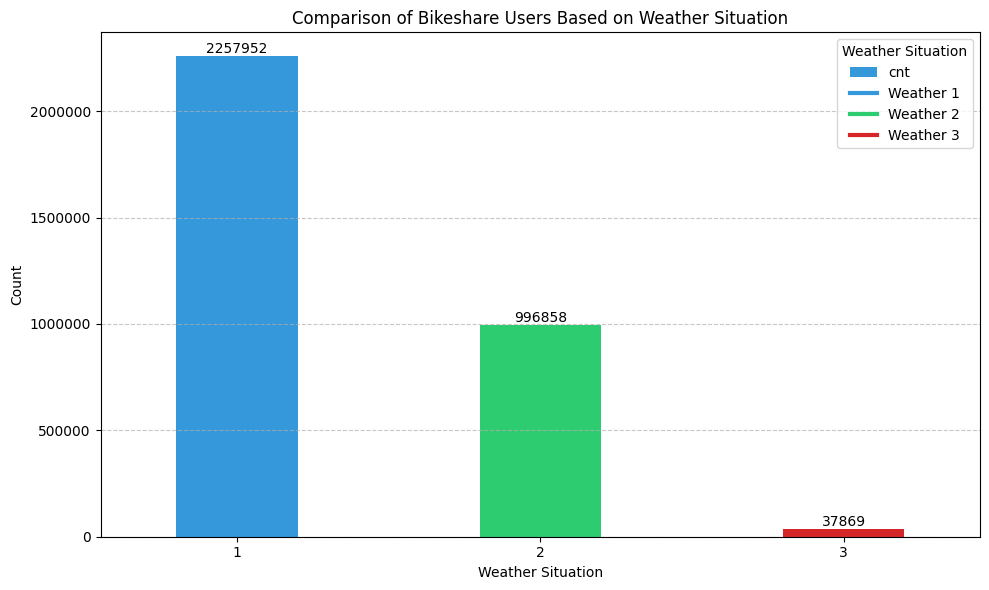

In [ ]:
# Membuat plot dengan batang berwarna beda dan legend untuk tiap kondisi cuaca
plt.figure(figsize=(10, 6))
ax = weater_df.plot(kind='bar', width=0.4, color=['#3498db', '#2ecc71', '#d62728'])
ax.set_xticklabels(weater_df.index, rotation=0)
ax.set_xlabel('Weather Situation')
ax.set_ylabel('Count')
ax.set_title('Comparison of Bikeshare Users Based on Weather Situation')

# Menambahkan grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan shadow pada bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Menambahkan tanda angka pada sumbu y
ax.set_yticklabels(['{:.0f}'.format(x) for x in ax.get_yticks()])

# Menambahkan legend untuk tiap kondisi cuaca
handles, labels = ax.get_legend_handles_labels()
weather_labels = ['Weather 1', 'Weather 2', 'Weather 3']
weather_handles = [plt.Line2D([0], [0], color=color, linewidth=3, label=label) for color, label in zip(['#3498db', '#2ecc71', '#d62728'], weather_labels)]
ax.legend(handles=handles + weather_handles, title='Weather Situation')

plt.tight_layout()
plt.show()

Dari hasil diatas didapat kesimpulan bahwa pengguna Bikeshare paling banyak penggunannya saat cuaca Clear, Few clouds, Partly cloudy, Partly cloudy dan yang paling sedikit adalah cuacu Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

## RFM Analysis

In [ ]:
# Ubah kolom 'dteday' menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Menghitung Recency, diubah menjadi jumlah hari
tanggal_terbaru = day_df["dteday"].max()
day_df["recency"] = (tanggal_terbaru - day_df["dteday"]).dt.days

In [ ]:
# Analisis RFM
rfm_df = day_df.groupby('casual').agg({
    'recency': 'min',    # Recency: Kapan terakhir pelanggan melakukan transaksi?
    'instant': 'count',  # Frequency: Seberapa sering seorang pelanggan melakukan pembelian?
    'cnt': 'sum'         # Monetary: Total nilai pembelian
}).reset_index()
rfm_df.columns = ["casual", "recency", "frequency", "monetary"]

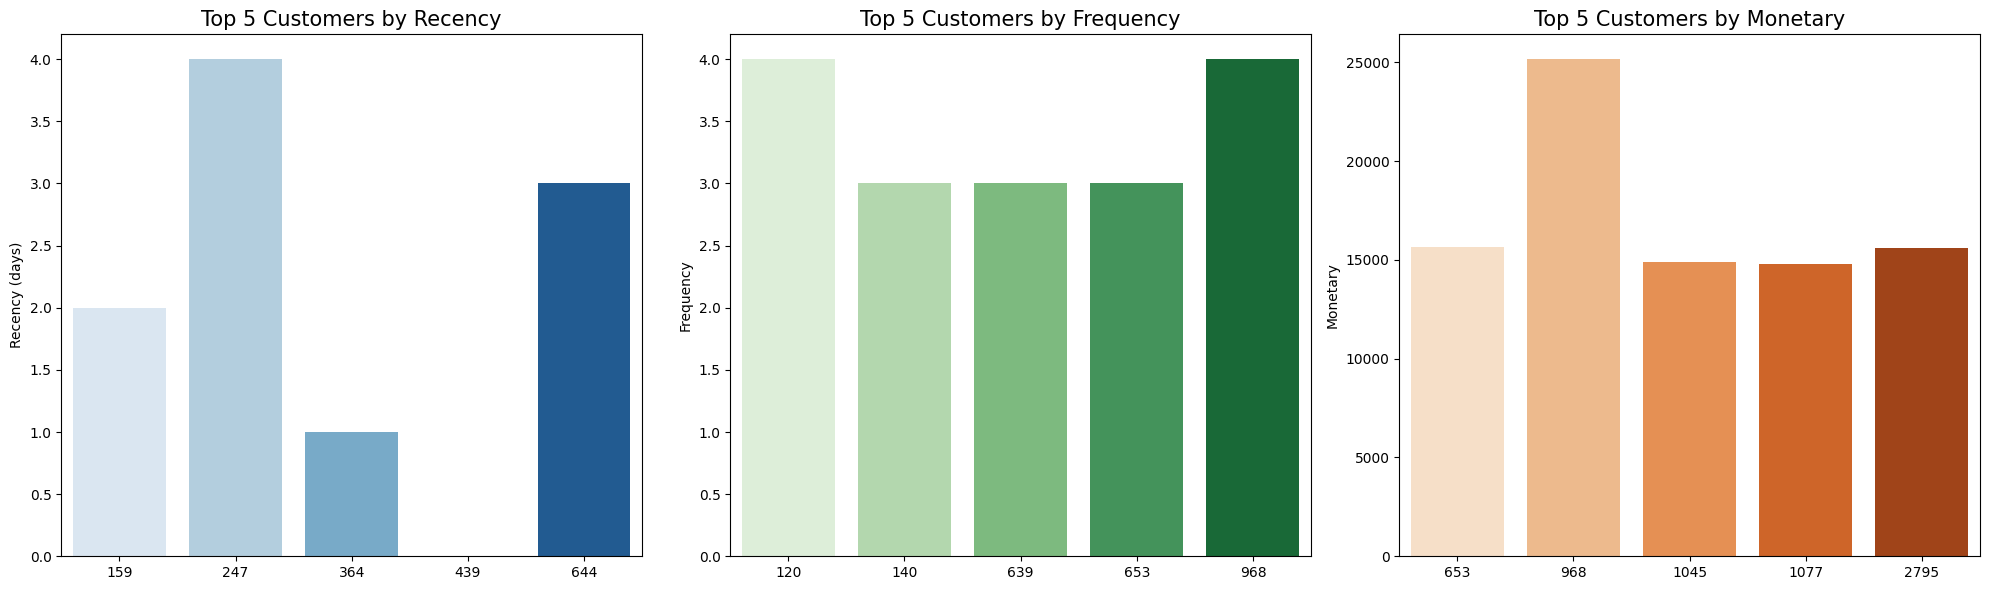

In [ ]:
# Visualisasi dengan Bar Plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plot Recency
sns.barplot(y="recency", x="casual", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette="Blues", ax=ax[0])
ax[0].set_ylabel("Recency (days)")
ax[0].set_xlabel(None)
ax[0].set_title("Top 5 Customers by Recency", fontsize=15)

# Plot Frequency
sns.barplot(y="frequency", x="casual", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette="Greens", ax=ax[1])
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel(None)
ax[1].set_title("Top 5 Customers by Frequency", fontsize=15)

# Plot Monetary
sns.barplot(y="monetary", x="casual", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette="Oranges", ax=ax[2])
ax[2].set_ylabel("Monetary")
ax[2].set_xlabel(None)
ax[2].set_title("Top 5 Customers by Monetary", fontsize=15)

plt.tight_layout()
plt.show()


Dari hasil diatas didapat top 5 customer by recency dan yang paling atas adalah 247. Untuk top 5 customers by frequency yang paling atas adalah 968. Kemudian untuk top 5 customers by monetary yang paling atas adalah 968.

## Conclusion

- Conclusion pertanyaan 1: terdapat kesimpulan bahwa pada tahun 2011 pengguna Bikeshare paling banyak dari golongan registered yaitu bulan 6 dan untuk pengguna Bikeshare paling banyak dari golongan casual yaiut bulan 7. Pada tahun 2012 pengguna Bikeshare paling banyak dari golongan registered yaitu bulan 9 dan untuk pengguna Bikeshare paling banyak dari golongan casual yaiut bulan 9.

- Conclusion pertanyaan 2: Kesimpulan yang didapat adalah  bahwa pengguna Bikeshare terbanyak ada di bulan September 2012 dan paling terendah adalah Januari 2011

- Conclusion pertanyaa 3: Kesimpulan yang didapat adalah Penggunaan Bikeshare paling sering digunakan saat cuaca Clear, Few clouds, Partly cloudy, Partly cloudy